In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_cleaned_v2.csv')

In [4]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,...,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,...,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,...,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,...,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,...,1750.0,NaN,NaN,0,0,0,0,0,0,75


In [5]:
df.shape

(3480, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   society              3479 non-null   object 
 1   property_type        3480 non-null   object 
 2   price                3462 non-null   float64
 3   price_per_sqft       3462 non-null   float64
 4   areaWithType         3480 non-null   object 
 5   area                 3462 non-null   float64
 6   bedRoom              3480 non-null   int64  
 7   bathroom             3480 non-null   int64  
 8   balcony              3480 non-null   object 
 9   floorNum             3459 non-null   float64
 10  facing               2517 non-null   object 
 11  agePossession        3480 non-null   object 
 12  property_id          2561 non-null   object 
 13  sector               3480 non-null   object 
 14  super_built_up_area  1736 non-null   float64
 15  built_up_area        1705 non-null   f

In [7]:
df.duplicated().sum()

103

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,emaar palm gardens,flat,1.75,9210.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3,3,3,6.0,...,1900.0,1600.0,1240.0,0,1,0,0,0,2,150
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3,3,2,9.0,...,1376.0,NaN,NaN,0,0,1,0,0,2,117
2,ss the leaf,flat,2.13,7574.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4,4,3,6.0,...,2812.0,2600.0,2400.0,0,0,0,0,0,0,49
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5,7,3+,3.0,...,NaN,6228.0,NaN,1,1,1,1,0,0,147
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3,3,2,9.0,...,1750.0,NaN,NaN,0,0,0,0,0,0,75


# property_type

<Axes: xlabel='property_type'>

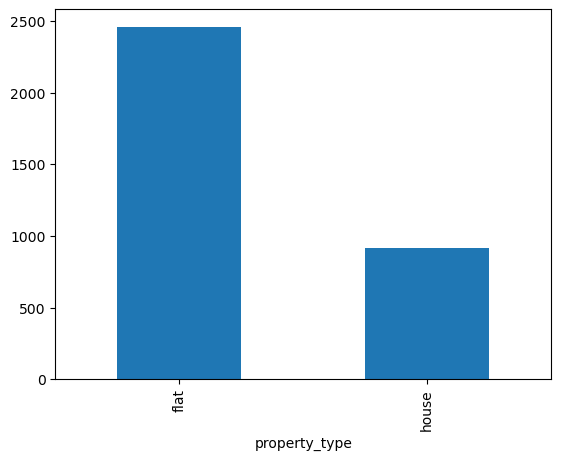

In [10]:
df['property_type'].value_counts().plot(kind='bar',)

Observations
    Flats are in majority(75 percent) and there are less number of houses(~25 percent)
    No missing values

# society

In [11]:
df['society'].value_counts().shape

(591,)

In [12]:
df['society'].value_counts()

society
independent                             534
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
sneh vihar                                1
raheja vedas                              1
bptp park generations                     1
huda plots                                1
row house                                 1
Name: count, Length: 591, dtype: int64

In [13]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.026390
ss the leaf                             0.052076
shapoorji pallonji joyville gurugram    0.066854
dlf new town heights                    0.081633
shree vardhman victoria                 0.093596
                                          ...   
godrej aria                             0.525334
tarc maceo                              0.529205
sbtl caladium                           0.533075
dlf city plots phase 2                  0.536946
raheja vedaanta                         0.540816
Name: proportion, Length: 75, dtype: float64

In [14]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 81,
 'Low (2-9)': 249,
 'Very Low (1)': 258}

<Axes: xlabel='society'>

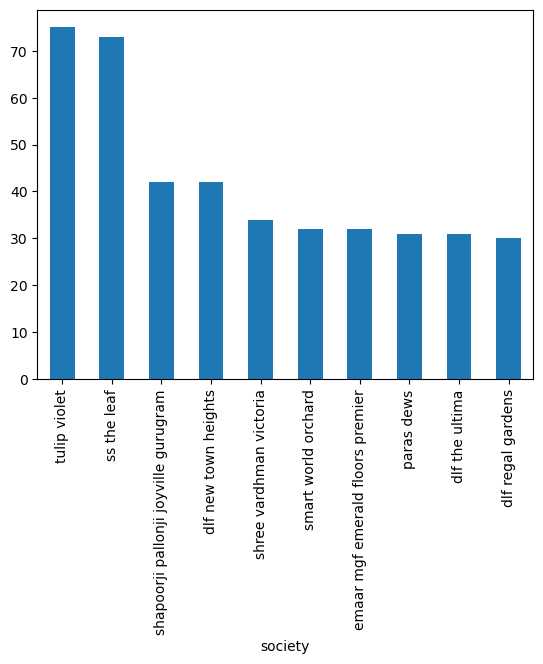

In [15]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [16]:
df['society'].isnull().sum()

1

In [17]:
df[df['society'].isnull()]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
496,NaN,flat,0.6,3692.0,Built Up area: 1625 (150.97 sq.m.),1625.0,2,2,0,NaN,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


Observations
    Around 13% properties comes under independent tag.
    There are 675 societies.

The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    Very High (>100): Only 1 society has more than 100 listings.
    High (50-100): 2 societies have between 50 to 100 listings.
    Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    Low (2-9): 273 societies have between 2 to 9 listings.
    Very Low (1): A significant number, 308 societies, have only 1 listing.
1 missing value

# sector

In [18]:
# unique sectors
df['sector'].value_counts().shape

(108,)

<Axes: xlabel='sector'>

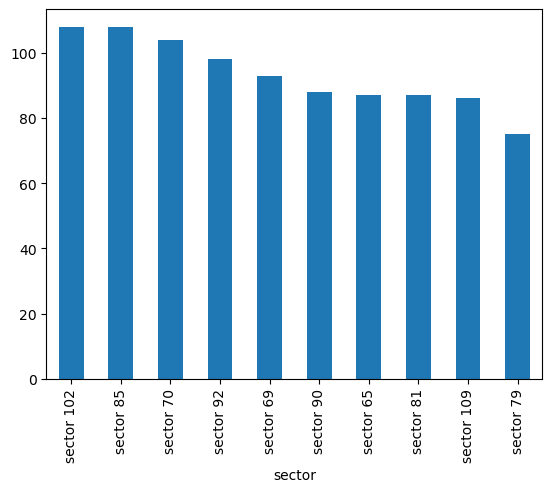

In [19]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [20]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 22,
 'Average (10-49)': 62,
 'Low (2-9)': 21,
 'Very Low (1)': 0}

Observations
    There are a total of 104 unique sectors in the dataset.
Frequency distribution of sectors:
    Very High (>100): 3 sectors have more than 100 listings.
    High (50-100): 25 sectors have between 50 to 100 listings.
    Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
    Low (2-9): 16 sectors have between 2 to 9 listings.
    Very Low (1): Interestingly, there are no sectors with only 1 listing.

# Price

In [28]:
df['price'].isnull().sum()

17

In [36]:
df['price'].describe()

count    3360.000000
mean        2.634509
std         3.067394
min         0.070000
25%         0.990000
50%         1.600000
75%         2.862500
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

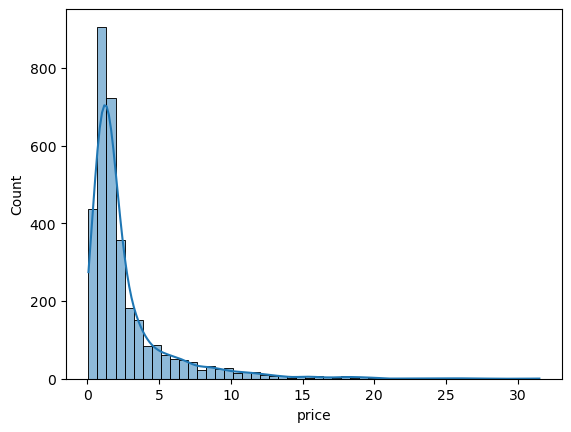

In [37]:
sns.histplot(df['price'], kde=True, bins=50)

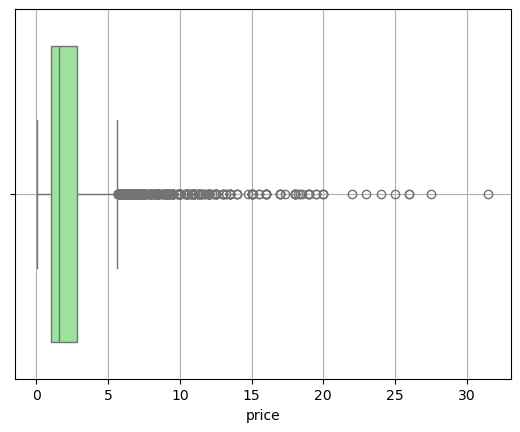

In [38]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

    Descriptive Statistics:
    
        Count: There are 3,660 non-missing price entries.
        Mean Price: The average price is approximately 2.53 crores.
    Median Price: The median (or 50th percentile) price is 1.52 crores.
    Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
    Visualizations:
    
    Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
    Missing Values: There are 17 missing values in the price column.

In [39]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.208473685629061 14.078754962977643


    Skewness: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.
    
    Kurtosis: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [40]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.27
0.05     0.41
0.95     9.00
0.99    16.00
Name: price, dtype: float64

    Quantile Analysis:
    
    1% Quantile: Only 1% of properties are priced below 0.25 crores.
    5% Quantile: 5% of properties are priced below 0.37 crores.
    95% Quantile: 95% of properties are priced below 8.5 crores.
    99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [41]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8724999999999998

In [42]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.8187499999999999 5.67125


In [43]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(376, 24)

In [44]:
outliers['price'].describe()

count    376.000000
mean       9.705559
std        4.125436
min        5.700000
25%        6.750000
50%        8.500000
75%       11.000000
max       31.500000
Name: price, dtype: float64